In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xtrack as xt
import xpart as xp
import xobjects as xo
import xcoll as xc
from pathlib import Path
import json

import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import colormaps
import re

In [2]:
def df_to_delta(df):
    sps_gtr = 17.95
    sps_g0 = 27.643
    f0 = 200e6
    eta = 1/sps_gtr**2 - 1/sps_g0**2
    return -df/(f0*eta)

In [4]:
def interpolate_50_val(xvals, yvals):
    if np.any(yvals <= 0.5):  # ensure the curve actually crosses 0.5
        idx_above = np.where(yvals > 0.5)[0][-1]   # last index above 0.5
        idx_below = idx_above + 1                  # first index below 0.5

        # Linear interpolation for more accuracy
        x50 = np.interp(0.5, [yvals[idx_above], yvals[idx_below]],
                            [xvals[idx_above], xvals[idx_below]])
        return x50
    else:
        print("Warning: The curve does not cross 0.5")
        return None

# No optimal shifts, no quad shifts

case0_quadshift_False_Simulation1 DPneg: delta_50 = -6.373e-3
case0_quadshift_False_Simulation1 DPpos: delta_50 = 6.744e-3
case0_quadshift_False_Simulation2 DPneg: delta_50 = -6.460e-3
case0_quadshift_False_Simulation2 DPpos: delta_50 = 6.839e-3
case0_quadshift_False_Simulation3 DPneg: delta_50 = -6.245e-3
case0_quadshift_False_Simulation3 DPpos: delta_50 = 6.933e-3
case0_quadshift_False_Simulation4 DPneg: delta_50 = -6.084e-3
case0_quadshift_False_Simulation4 DPpos: delta_50 = 6.813e-3
case0_quadshift_False_Simulation5 DPneg: delta_50 = -6.340e-3
case0_quadshift_False_Simulation5 DPpos: delta_50 = 6.816e-3
case0_quadshift_False_Simulation6 DPneg: delta_50 = -6.440e-3
case0_quadshift_False_Simulation6 DPpos: delta_50 = 6.794e-3
case0_quadshift_False_Simulation7 DPneg: delta_50 = -6.393e-3
case0_quadshift_False_Simulation7 DPpos: delta_50 = 6.722e-3
case0_quadshift_False_Simulation8 DPneg: delta_50 = -6.460e-3
case0_quadshift_False_Simulation8 DPpos: delta_50 = 6.825e-3
case0_quadshift_

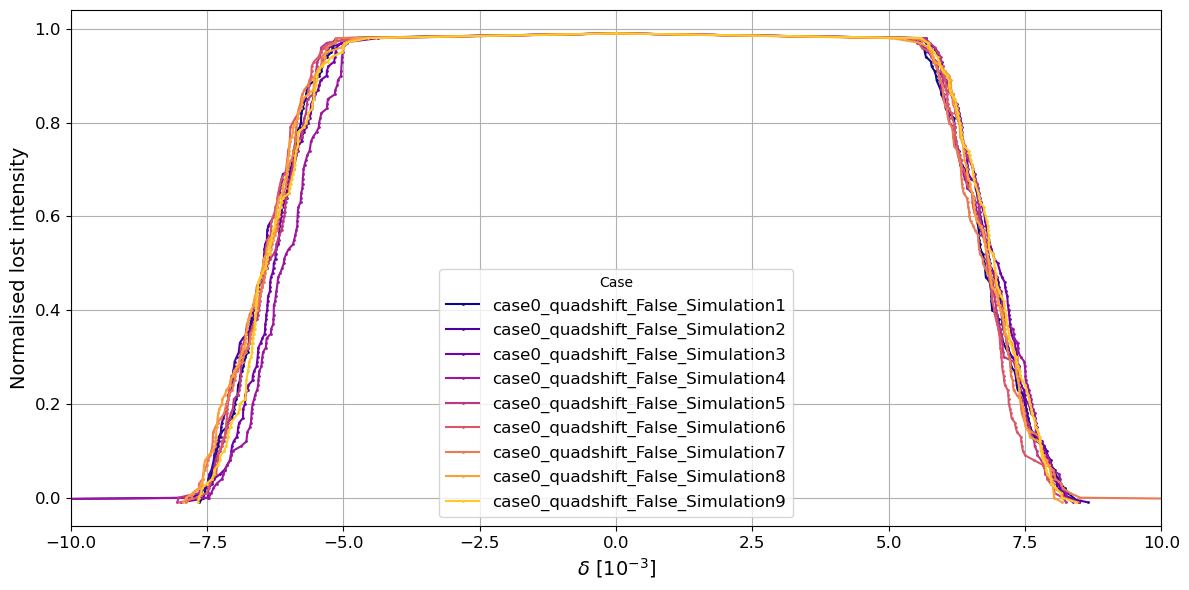

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

input_data = {}
delta_50_vals = {}

dir = Path('/Users/lisepauwels/sps_simulations/Prototyping/20251016/results/')
subdirs = [p for p in dir.iterdir() if p.is_dir() and 'False' in p.stem and 'case0' in p.stem]

cases = [p.stem for p in subdirs]

cases, subdirs = zip(*sorted(zip(cases, subdirs)))
cases = list(cases)
subdirs = list(subdirs)


cmap = colormaps['plasma']
colors = {base: cmap(i / len(cases)) for i, base in enumerate(cases)}

for case, subdir in zip(cases, subdirs):
    input_data[case] = {}
    color = colors[case]
    for plane in ['DPneg', 'DPpos']:
        with open(subdir / plane / f'IntensityLoss_{case}.json', 'r') as fid:
            input_data[case][plane] = json.load(fid)

        turns = list(input_data[case][plane].keys())
        num_particles = input_data[case][plane]['num_particles']
        sweep_per_turn = input_data[case][plane]['sweep_per_turn']
        turns.remove('num_particles')
        turns.remove('sweep_per_turn')

        turns = np.array(turns, dtype=int)
        deltas = df_to_delta(sweep_per_turn * turns)
        deltas = np.concatenate((np.array([0]), deltas))
        counts = np.array([input_data[case][plane][str(turn)] for turn in turns], dtype=int)
        counts = np.concatenate((np.array([1]), counts))

        if plane == 'DPneg':
            label = case
        else:
            label = None
        ax.plot(
            deltas * 1e3,
            1 - np.cumsum(counts) / num_particles,
            marker='o',
            markersize=1,
            label=label,
            color=color,
        )

        val_50 = interpolate_50_val(deltas, 1 - np.cumsum(counts) / num_particles) * 1e3
        print(f'{case} {plane}: delta_50 = {val_50:.3f}e-3')
        delta_50_vals[case] = float(val_50)
ax.grid()
ax.set_xlabel(r'$\delta$ $[10^{-3}]$', fontsize=14)
ax.set_ylabel('Normalised lost intensity', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(-10, 10)
ax.legend(title='Case', fontsize=12)

fig.tight_layout()

# No optimal shifts, quad shifts

case0_quadshift_True_Simulation1 DPneg: delta_50 = -6.354e-3
case0_quadshift_True_Simulation1 DPpos: delta_50 = 6.599e-3
case0_quadshift_True_Simulation2 DPneg: delta_50 = -6.443e-3
case0_quadshift_True_Simulation2 DPpos: delta_50 = 6.786e-3
case0_quadshift_True_Simulation3 DPneg: delta_50 = -6.162e-3
case0_quadshift_True_Simulation3 DPpos: delta_50 = 6.802e-3
case0_quadshift_True_Simulation4 DPneg: delta_50 = -5.897e-3
case0_quadshift_True_Simulation4 DPpos: delta_50 = 6.992e-3
case0_quadshift_True_Simulation5 DPneg: delta_50 = -6.446e-3
case0_quadshift_True_Simulation5 DPpos: delta_50 = 6.930e-3
case0_quadshift_True_Simulation6 DPneg: delta_50 = -6.217e-3
case0_quadshift_True_Simulation6 DPpos: delta_50 = 6.847e-3
case0_quadshift_True_Simulation7 DPneg: delta_50 = -6.293e-3
case0_quadshift_True_Simulation7 DPpos: delta_50 = 7.081e-3
case0_quadshift_True_Simulation8 DPneg: delta_50 = -6.178e-3
case0_quadshift_True_Simulation8 DPpos: delta_50 = 6.800e-3
case0_quadshift_True_Simulation9

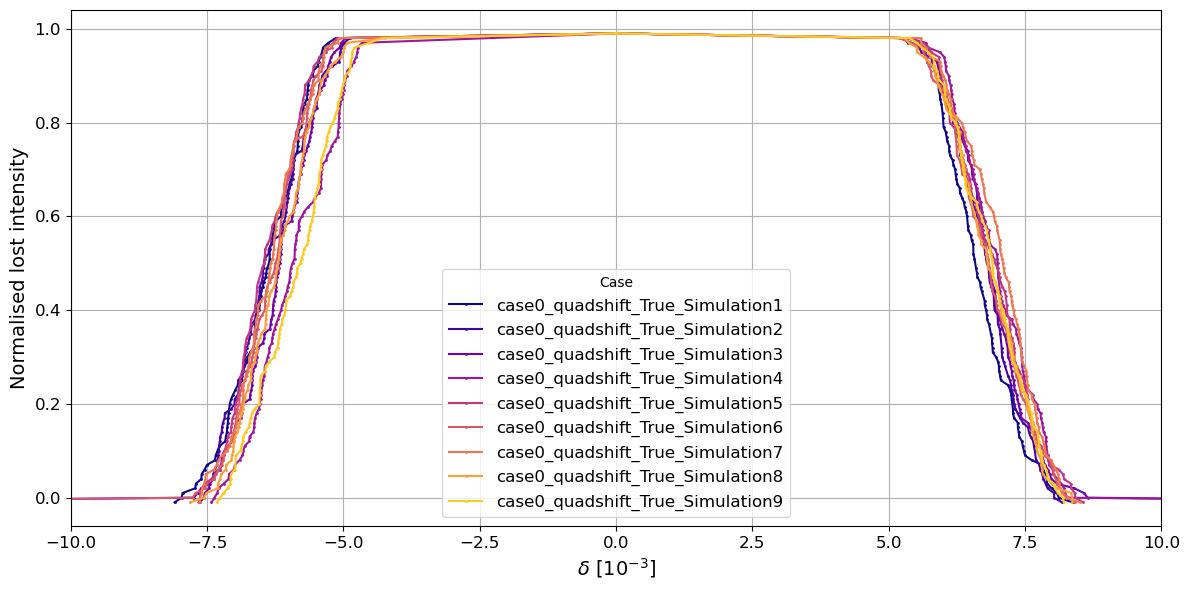

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

input_data = {}
delta_50_vals = {}

dir = Path('/Users/lisepauwels/sps_simulations/Prototyping/20251016/results/')
subdirs = [p for p in dir.iterdir() if p.is_dir() and 'True' in p.stem and 'case0' in p.stem]

cases = [p.stem for p in subdirs]

cases, subdirs = zip(*sorted(zip(cases, subdirs)))
cases = list(cases)
subdirs = list(subdirs)


cmap = colormaps['plasma']
colors = {base: cmap(i / len(cases)) for i, base in enumerate(cases)}

for case, subdir in zip(cases, subdirs):
    input_data[case] = {}
    color = colors[case]
    for plane in ['DPneg', 'DPpos']:
        with open(subdir / plane / f'IntensityLoss_{case}.json', 'r') as fid:
            input_data[case][plane] = json.load(fid)

        turns = list(input_data[case][plane].keys())
        num_particles = input_data[case][plane]['num_particles']
        sweep_per_turn = input_data[case][plane]['sweep_per_turn']
        turns.remove('num_particles')
        turns.remove('sweep_per_turn')

        turns = np.array(turns, dtype=int)
        deltas = df_to_delta(sweep_per_turn * turns)
        deltas = np.concatenate((np.array([0]), deltas))
        counts = np.array([input_data[case][plane][str(turn)] for turn in turns], dtype=int)
        counts = np.concatenate((np.array([1]), counts))

        if plane == 'DPneg':
            label = case
        else:
            label = None
        ax.plot(
            deltas * 1e3,
            1 - np.cumsum(counts) / num_particles,
            marker='o',
            markersize=1,
            label=label,
            color=color,
        )

        val_50 = interpolate_50_val(deltas, 1 - np.cumsum(counts) / num_particles) * 1e3
        print(f'{case} {plane}: delta_50 = {val_50:.3f}e-3')
        delta_50_vals[case] = float(val_50)
ax.grid()
ax.set_xlabel(r'$\delta$ $[10^{-3}]$', fontsize=14)
ax.set_ylabel('Normalised lost intensity', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(-10, 10)
ax.legend(title='Case', fontsize=12)

fig.tight_layout()

# Optimal shifts, no quad shifts

case7_quadshift_False_Simulation1 DPneg: delta_50 = -6.543e-3
case7_quadshift_False_Simulation1 DPpos: delta_50 = 6.922e-3
case7_quadshift_False_Simulation2 DPneg: delta_50 = -6.465e-3
case7_quadshift_False_Simulation2 DPpos: delta_50 = 7.181e-3
case7_quadshift_False_Simulation3 DPneg: delta_50 = -6.304e-3
case7_quadshift_False_Simulation3 DPpos: delta_50 = 6.872e-3
case7_quadshift_False_Simulation4 DPneg: delta_50 = -6.014e-3
case7_quadshift_False_Simulation4 DPpos: delta_50 = 6.995e-3
case7_quadshift_False_Simulation5 DPneg: delta_50 = -6.440e-3
case7_quadshift_False_Simulation5 DPpos: delta_50 = 6.889e-3
case7_quadshift_False_Simulation6 DPneg: delta_50 = -6.496e-3
case7_quadshift_False_Simulation6 DPpos: delta_50 = 6.841e-3
case7_quadshift_False_Simulation7 DPneg: delta_50 = -6.418e-3
case7_quadshift_False_Simulation7 DPpos: delta_50 = 6.850e-3
case7_quadshift_False_Simulation8 DPneg: delta_50 = -6.318e-3
case7_quadshift_False_Simulation8 DPpos: delta_50 = 6.975e-3
case7_quadshift_

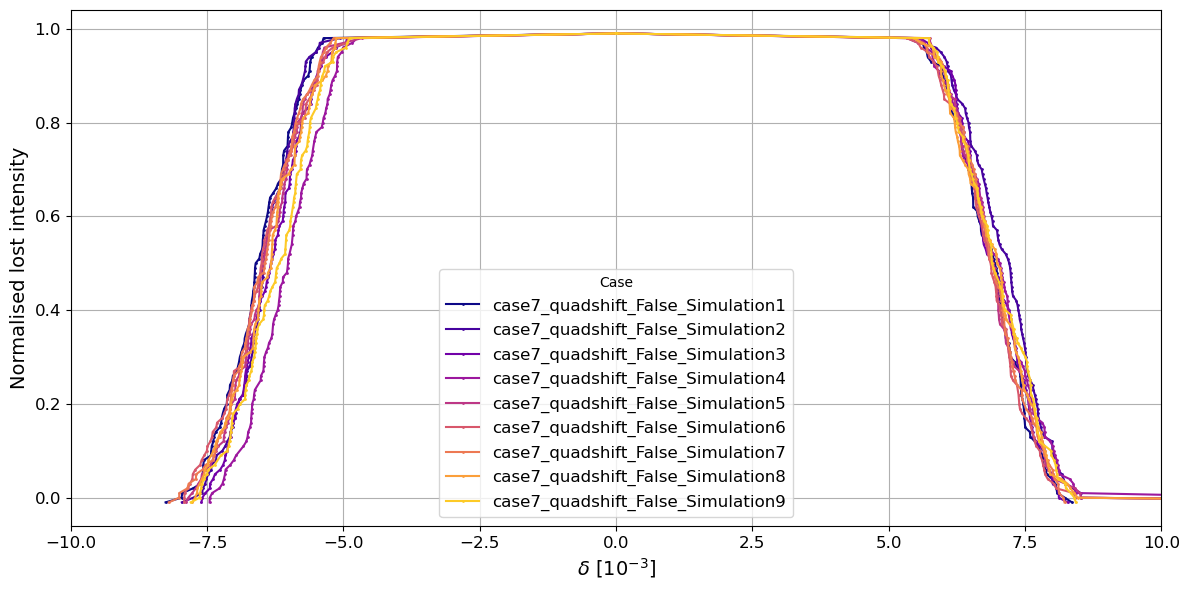

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

input_data = {}
delta_50_vals = {}

dir = Path('/Users/lisepauwels/sps_simulations/Prototyping/20251016/results/')
subdirs = [p for p in dir.iterdir() if p.is_dir() and 'False' in p.stem and 'case7' in p.stem]

cases = [p.stem for p in subdirs]

cases, subdirs = zip(*sorted(zip(cases, subdirs)))
cases = list(cases)
subdirs = list(subdirs)


cmap = colormaps['plasma']
colors = {base: cmap(i / len(cases)) for i, base in enumerate(cases)}

for case, subdir in zip(cases, subdirs):
    input_data[case] = {}
    color = colors[case]
    for plane in ['DPneg', 'DPpos']:
        with open(subdir / plane / f'IntensityLoss_{case}.json', 'r') as fid:
            input_data[case][plane] = json.load(fid)

        turns = list(input_data[case][plane].keys())
        num_particles = input_data[case][plane]['num_particles']
        sweep_per_turn = input_data[case][plane]['sweep_per_turn']
        turns.remove('num_particles')
        turns.remove('sweep_per_turn')

        turns = np.array(turns, dtype=int)
        deltas = df_to_delta(sweep_per_turn * turns)
        deltas = np.concatenate((np.array([0]), deltas))
        counts = np.array([input_data[case][plane][str(turn)] for turn in turns], dtype=int)
        counts = np.concatenate((np.array([1]), counts))

        if plane == 'DPneg':
            label = case
        else:
            label = None
        ax.plot(
            deltas * 1e3,
            1 - np.cumsum(counts) / num_particles,
            marker='o',
            markersize=1,
            label=label,
            color=color,
        )

        val_50 = interpolate_50_val(deltas, 1 - np.cumsum(counts) / num_particles) * 1e3
        print(f'{case} {plane}: delta_50 = {val_50:.3f}e-3')
        delta_50_vals[case] = float(val_50)
ax.grid()
ax.set_xlabel(r'$\delta$ $[10^{-3}]$', fontsize=14)
ax.set_ylabel('Normalised lost intensity', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(-10, 10)
ax.legend(title='Case', fontsize=12)

fig.tight_layout()

# Optimal shifts, quad shifts

case7_quadshift_True_Simulation1 DPneg: delta_50 = -6.451e-3
case7_quadshift_True_Simulation1 DPpos: delta_50 = 6.855e-3
case7_quadshift_True_Simulation2 DPneg: delta_50 = -6.382e-3
case7_quadshift_True_Simulation2 DPpos: delta_50 = 6.811e-3
case7_quadshift_True_Simulation3 DPneg: delta_50 = -6.098e-3
case7_quadshift_True_Simulation3 DPpos: delta_50 = 6.989e-3
case7_quadshift_True_Simulation4 DPneg: delta_50 = -5.797e-3
case7_quadshift_True_Simulation4 DPpos: delta_50 = 6.956e-3
case7_quadshift_True_Simulation5 DPneg: delta_50 = -6.354e-3
case7_quadshift_True_Simulation5 DPpos: delta_50 = 6.788e-3
case7_quadshift_True_Simulation6 DPneg: delta_50 = -6.468e-3
case7_quadshift_True_Simulation6 DPpos: delta_50 = 6.978e-3
case7_quadshift_True_Simulation7 DPneg: delta_50 = -6.354e-3
case7_quadshift_True_Simulation7 DPpos: delta_50 = 6.861e-3
case7_quadshift_True_Simulation8 DPneg: delta_50 = -6.120e-3
case7_quadshift_True_Simulation8 DPpos: delta_50 = 6.836e-3
case7_quadshift_True_Simulation9

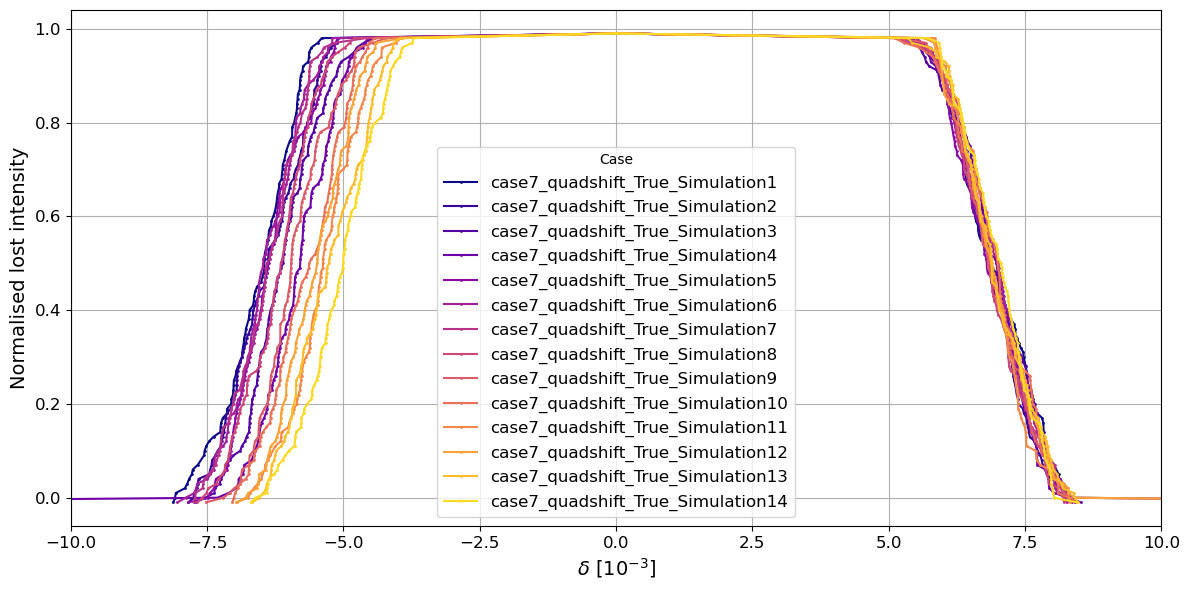

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))

input_data = {}
delta_50_vals = {}

dir = Path('/Users/lisepauwels/sps_simulations/Prototyping/20251016/results/')
subdirs = [p for p in dir.iterdir() if p.is_dir() and 'True' in p.stem and 'case7' in p.stem]
cases = [p.stem for p in subdirs]

cases, subdirs = zip(
    *sorted(
        zip(cases, subdirs),
        key=lambda x: int(re.search(r'Simulation(\d+)', x[0]).group(1))
    )
)

cases = list(cases)
subdirs = list(subdirs)
DPneg_vals = {}
DPpos_vals = {}

cmap = colormaps['plasma']
colors = {base: cmap(i / len(cases)) for i, base in enumerate(cases)}

for case, subdir in zip(cases, subdirs):
    input_data[case] = {}
    color = colors[case]
    for plane in ['DPneg', 'DPpos']:
        with open(subdir / plane / f'IntensityLoss_{case}.json', 'r') as fid:
            input_data[case][plane] = json.load(fid)

        turns = list(input_data[case][plane].keys())
        num_particles = input_data[case][plane]['num_particles']
        sweep_per_turn = input_data[case][plane]['sweep_per_turn']
        turns.remove('num_particles')
        turns.remove('sweep_per_turn')

        turns = np.array(turns, dtype=int)
        deltas = df_to_delta(sweep_per_turn * turns)
        deltas = np.concatenate((np.array([0]), deltas))
        counts = np.array([input_data[case][plane][str(turn)] for turn in turns], dtype=int)
        counts = np.concatenate((np.array([1]), counts))

        if plane == 'DPneg':
            label = case
        else:
            label = None
        ax.plot(
            deltas * 1e3,
            1 - np.cumsum(counts) / num_particles,
            marker='o',
            markersize=1,
            label=label,
            color=color,
        )

        val_50 = interpolate_50_val(deltas, 1 - np.cumsum(counts) / num_particles) * 1e3

        if plane == 'DPneg':
            
            DPneg_vals[case.split('_')[-1]] = val_50*1e-3
        else:
            DPpos_vals[case.split('_')[-1]] = val_50*1e-3
            
        print(f'{case} {plane}: delta_50 = {val_50:.3f}e-3')
        delta_50_vals[case] = float(val_50)
ax.grid()
ax.set_xlabel(r'$\delta$ $[10^{-3}]$', fontsize=14)
ax.set_ylabel('Normalised lost intensity', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(-10, 10)
ax.legend(title='Case', fontsize=12)

fig.tight_layout()

In [29]:
shifts = {
    'Simulation1':  {'qd.31110': -1e-3, 'qd.50110': -1e-3, 'qd.20110': -1e-3},
    'Simulation2':  {'qd.31110': -2e-3, 'qd.50110': -2e-3, 'qd.20110': -2e-3},
    'Simulation3':  {'qd.31110': -3e-3, 'qd.50110': -3e-3, 'qd.20110': -3e-3},
    'Simulation4':  {'qd.31110': -4e-3, 'qd.50110': -4e-3, 'qd.20110': -4e-3},
    'Simulation5':  {'qd.31110': -2e-3, 'qd.50110': -3e-3, 'qd.20110': -3e-3},
    'Simulation6':  {'qd.31110': -2e-3, 'qd.50110': -3e-3, 'qd.20110': -2e-3},
    'Simulation7':  {'qd.31110': -2e-3, 'qd.50110': -3e-3, 'qd.20110': -3e-3},
    'Simulation8':  {'qd.31110': -2e-3, 'qd.50110': -4e-3, 'qd.20110': -3e-3},
    'Simulation9':  {'qd.31110': -2e-3, 'qd.50110': -5e-3, 'qd.20110': -3e-3},
    'Simulation10': {'qd.31110': -2e-3, 'qd.50110': -6e-3, 'qd.20110': -3e-3},
    'Simulation11': {'qd.31110': -2e-3, 'qd.50110': -7e-3, 'qd.20110': -3e-3},
    'Simulation12': {'qd.31110': -5e-3, 'qd.50110': -5e-3, 'qd.20110': -5e-3},
    'Simulation13': {'qd.31110': -6e-3, 'qd.50110': -6e-3, 'qd.20110': -6e-3},
    'Simulation14': {'qd.31110': -7e-3, 'qd.50110': -7e-3, 'qd.20110': -7e-3},
}

df = pd.DataFrame.from_dict(shifts, orient='index')
df['DPneg'] = df.index.map(DPneg_vals)
df['DPpos'] = df.index.map(DPpos_vals)
pd.options.display.float_format = '{:.1e}'.format
print(df)

              qd.31110  qd.50110  qd.20110    DPneg   DPpos
Simulation1   -1.0e-03  -1.0e-03  -1.0e-03 -6.5e-03 6.9e-03
Simulation2   -2.0e-03  -2.0e-03  -2.0e-03 -6.4e-03 6.8e-03
Simulation3   -3.0e-03  -3.0e-03  -3.0e-03 -6.1e-03 7.0e-03
Simulation4   -4.0e-03  -4.0e-03  -4.0e-03 -5.8e-03 7.0e-03
Simulation5   -2.0e-03  -3.0e-03  -3.0e-03 -6.4e-03 6.8e-03
Simulation6   -2.0e-03  -3.0e-03  -2.0e-03 -6.5e-03 7.0e-03
Simulation7   -2.0e-03  -3.0e-03  -3.0e-03 -6.4e-03 6.9e-03
Simulation8   -2.0e-03  -4.0e-03  -3.0e-03 -6.1e-03 6.8e-03
Simulation9   -2.0e-03  -5.0e-03  -3.0e-03 -6.0e-03 6.8e-03
Simulation10  -2.0e-03  -6.0e-03  -3.0e-03 -5.6e-03 7.0e-03
Simulation11  -2.0e-03  -7.0e-03  -3.0e-03 -5.4e-03 6.9e-03
Simulation12  -5.0e-03  -5.0e-03  -5.0e-03 -5.5e-03 6.9e-03
Simulation13  -6.0e-03  -6.0e-03  -6.0e-03 -5.3e-03 6.9e-03
Simulation14  -7.0e-03  -7.0e-03  -7.0e-03 -5.0e-03 7.0e-03


# Loss locations

In [34]:
dir = Path('/Users/lisepauwels/sps_simulations/Prototyping/20251016/results/')
subdirs = [p for p in dir.iterdir() if p.is_dir() and 'True' in p.stem and 'case7' in p.stem]
cases = [p.stem for p in subdirs]

cases, subdirs = zip(
    *sorted(
        zip(cases, subdirs),
        key=lambda x: int(re.search(r'Simulation(\d+)', x[0]).group(1))
    )
)

cases = list(cases)
subdirs = list(subdirs)

loss_locations_DPneg = {}
loss_locations_DPpos = {}
for case, subdir in zip(cases, subdirs):
    with open(subdir / 'DPneg' / f'{case}_aper_losses.json', 'r') as fid:
        loss_locations_DPneg[case.split('_')[-1]] = json.load(fid)
    with open(subdir / 'DPpos' / f'{case}_aper_losses.json', 'r') as fid:
        loss_locations_DPpos[case.split('_')[-1]] = json.load(fid)

In [35]:
loss_locations_DPneg

{'Simulation1': {'lsd.22505.a_aper': 24,
  'veqd.31110.a_aper': 1,
  'vcak.32501.a_aper': 33,
  'vcak.42501.a_aper': 26,
  'vcak.52501.a_aper': 7,
  'lsd.52505.b_aper': 2,
  'vcak.61101.a_aper': 1,
  'vcak.62501.a_aper': 6},
 'Simulation2': {'veqd.31110.a_aper': 88,
  'vcak.32501.a_aper': 9,
  'vcak.42501.a_aper': 1,
  'vcak.62501.a_aper': 2},
 'Simulation3': {'veqd.31110.a_aper': 100},
 'Simulation4': {'sps$start': 1, 'veqd.31110.a_aper': 99},
 'Simulation5': {'veqd.20110.a_aper': 11,
  'veqd.31110.a_aper': 80,
  'vcak.32501.a_aper': 5,
  'veqd.50110.a_aper': 3,
  'vcak.62501.a_aper': 1},
 'Simulation6': {'veqd.31110.a_aper': 83,
  'vcak.32501.a_aper': 6,
  'veqd.50110.a_aper': 11},
 'Simulation7': {'veqd.20110.a_aper': 9,
  'veqd.31110.a_aper': 82,
  'vcak.32501.a_aper': 5,
  'veqd.50110.a_aper': 4},
 'Simulation8': {'veqd.31110.a_aper': 27, 'veqd.50110.a_aper': 73},
 'Simulation9': {'veqd.50110.a_aper': 100},
 'Simulation10': {'veqd.50110.a_aper': 100},
 'Simulation11': {'veqd.50110

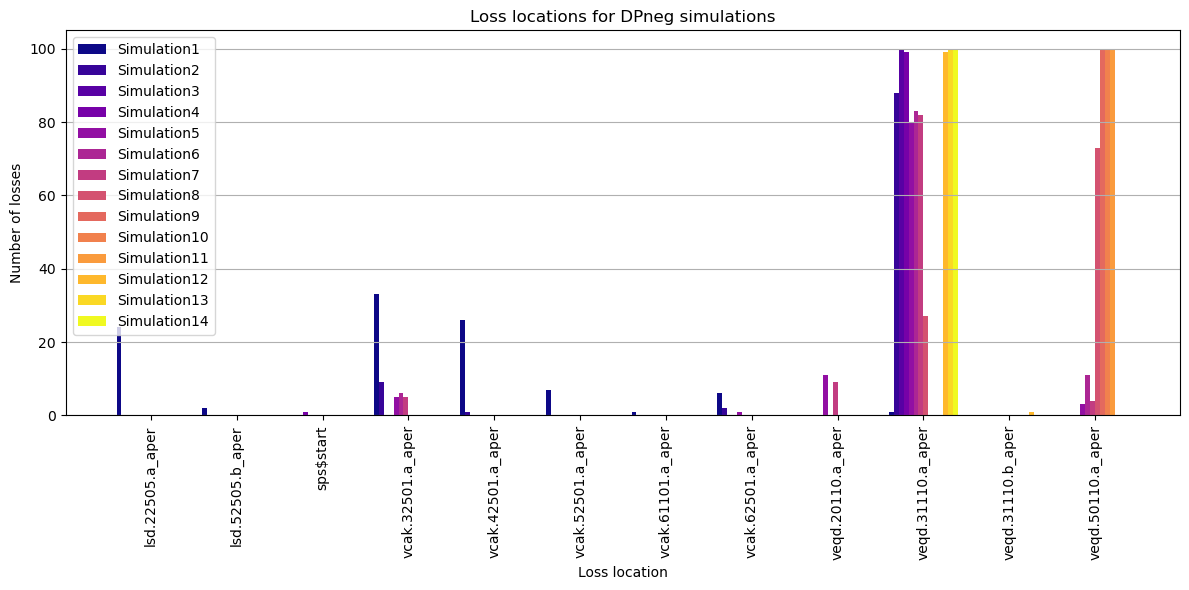

In [40]:
losses = loss_locations_DPneg.copy()
cmap = colormaps['plasma']
cases = list(losses.keys())
colors = {base: cmap(i / (len(cases)-1)) for i, base in enumerate(cases)}

# Collect all unique loss locations
all_locations = sorted({loc for sim in losses.values() for loc in sim.keys()})

# Set bar positions
x = np.arange(len(all_locations))
width = 0.8 / len(cases)  # adjust width if you want bars side by side

fig, ax = plt.subplots(figsize=(12,6))

for i, case in enumerate(cases):
    sim_losses = [losses[case].get(loc, 0) for loc in all_locations]
    ax.bar(x + i*width, sim_losses, width=width, color=colors[case], label=case)

ax.set_xticks(x + width*(len(cases)-1)/2)  # center ticks
ax.set_xticklabels(all_locations, rotation=90)
ax.set_ylabel("Number of losses")
ax.set_xlabel("Loss location")
ax.legend(loc='upper left')
ax.grid(axis='y')

ax.set_title('Loss locations for DPneg simulations')
fig.tight_layout()
plt.show()

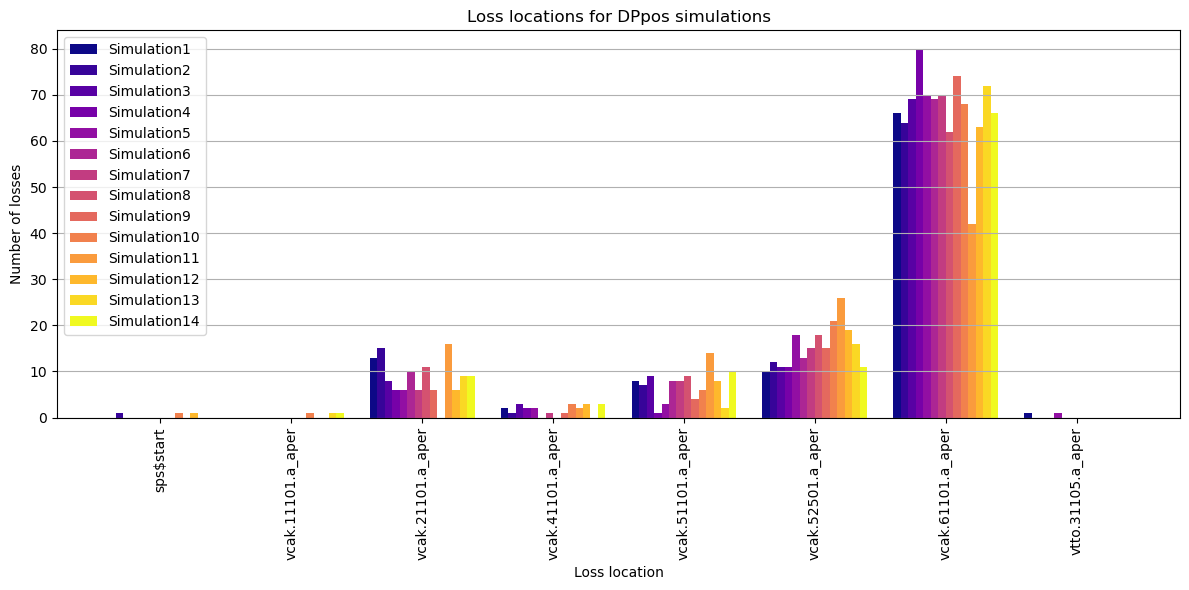

In [41]:
losses = loss_locations_DPpos.copy()
cmap = colormaps['plasma']
cases = list(losses.keys())
colors = {base: cmap(i / (len(cases)-1)) for i, base in enumerate(cases)}

# Collect all unique loss locations
all_locations = sorted({loc for sim in losses.values() for loc in sim.keys()})

# Set bar positions
x = np.arange(len(all_locations))
width = 0.8 / len(cases)  # adjust width if you want bars side by side

fig, ax = plt.subplots(figsize=(12,6))

for i, case in enumerate(cases):
    sim_losses = [losses[case].get(loc, 0) for loc in all_locations]
    ax.bar(x + i*width, sim_losses, width=width, color=colors[case], label=case)

ax.set_xticks(x + width*(len(cases)-1)/2)  # center ticks
ax.set_xticklabels(all_locations, rotation=90)
ax.set_ylabel("Number of losses")
ax.set_xlabel("Loss location")
ax.legend(loc='upper left')
ax.grid(axis='y')
ax.set_title('Loss locations for DPpos simulations')
fig.tight_layout()
plt.show()